# Image Classification with CNNs Using TensorFlow

### Author: Mohammed Shehab

### Overview
This notebook demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) using TensorFlow. 
The key focus is on experimenting with gradient descent optimization algorithm **Adam**.


**Run this command with new environment**

In [ ]:
# !pip install -r tensorflow_requirements.txt

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# MNIST Dataset Description

## Overview
The **MNIST (Modified National Institute of Standards and Technology)** dataset is a popular dataset for training and testing image processing systems. It is widely used for tasks like image classification and computer vision.

### Key Features:
- **Type:** Handwritten digit dataset.
- **Classes:** 10 (Digits 0 to 9).
- **Number of Samples:**
  - **Training Set:** 60,000 images.
  - **Test Set:** 10,000 images.
- **Image Size:** 28x28 pixels, grayscale.
- **Format:** Each image is a 2D array with pixel intensity values ranging from 0 to 255.

---

## Loading and Preprocessing

### Steps:
1. **Load the Data**:
   The dataset is loaded using TensorFlow's built-in `tf.keras.datasets.mnist` module.

   ```python
   from tensorflow.keras.datasets import mnist
   (x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# Normalize the images to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension for grayscale images
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Visualize some training images

In [8]:
def visualize_data(x, y):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i].squeeze(), cmap="gray")
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis("off")
    plt.show()

Visualizing sample training images...


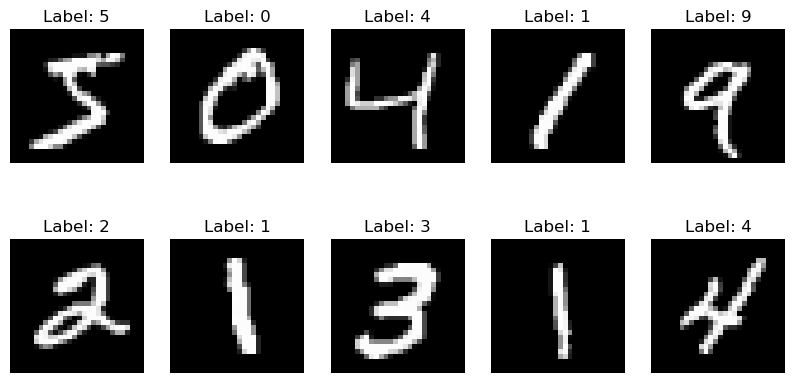

In [9]:
print("Visualizing sample training images...")
visualize_data(x_train, y_train)

# Building the Convolutional Neural Network (CNN)

## Overview
A **Convolutional Neural Network (CNN)** is a specialized deep learning architecture designed to process structured data, such as images. CNNs excel in tasks like image recognition and classification by leveraging spatial hierarchies in data.

In this section, we build a CNN using TensorFlow and Keras to classify images from the MNIST dataset.

---

## Architecture of the CNN

### Layers Used:
1. **Convolutional Layers**:
   - Apply a set of filters to extract features like edges, textures, and shapes.
   - Activation function: **ReLU** (Rectified Linear Unit) is used to introduce non-linearity.
2. **Pooling Layers**:
   - Downsample feature maps to reduce spatial dimensions and computation.
   - Type: **Max Pooling**, which captures the most important features in the local neighborhood.
3. **Flatten Layer**:
   - Converts 2D feature maps into a 1D vector for the fully connected layer.
4. **Fully Connected (Dense) Layers**:
   - Learn complex relationships between features.
   - The last dense layer uses the **Softmax** activation function for multi-class classification.

---

## TensorFlow Implementation

### Code:
The following code defines a simple CNN model for the MNIST dataset:

```python
from tensorflow.keras import layers, models

def build_cnn():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Second convolutional layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the feature maps
        layers.Flatten(),

        # Fully connected layer
        layers.Dense(128, activation='relu'),

        # Output layer with 10 neurons (for 10 classes)
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the CNN model
model = build_cnn()

# Print the summary of the model
model.summary()


In [10]:
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [11]:
print("Building the CNN model...")
model = build_cnn()
model.summary()

Building the CNN model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (

In [12]:
def compile_model(optimizer):
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
# Define a dictionary of optimizers
optimizers_dict = {
    "SGD": optimizers.SGD(learning_rate=0.01),
    "Momentum": optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "RMSProp": optimizers.RMSprop(learning_rate=0.001),
    "Adam": optimizers.Adam(learning_rate=0.001)
}

In [14]:
cnn_model = compile_model(optimizers.Adam(learning_rate=0.001))

In [15]:
history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=1
    )
    


Epoch 1/5
938/938 [==============================] - 10s 8ms/step - loss: 0.1585 - accuracy: 0.9526 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0439 - val_accuracy: 0.9847
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0355 - val_accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0258 - val_accuracy: 0.9921


In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
results = test_acc
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9921


### Visualize Training Performance

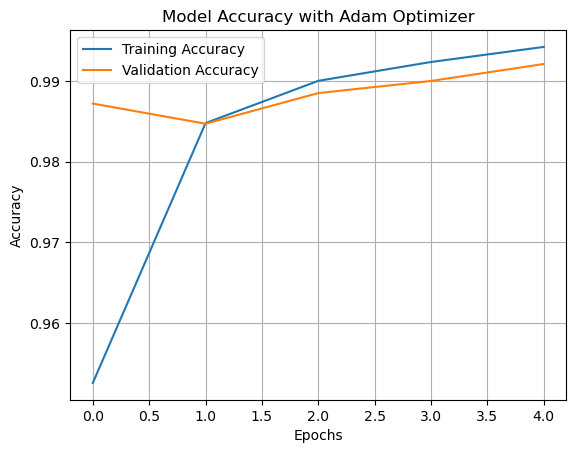

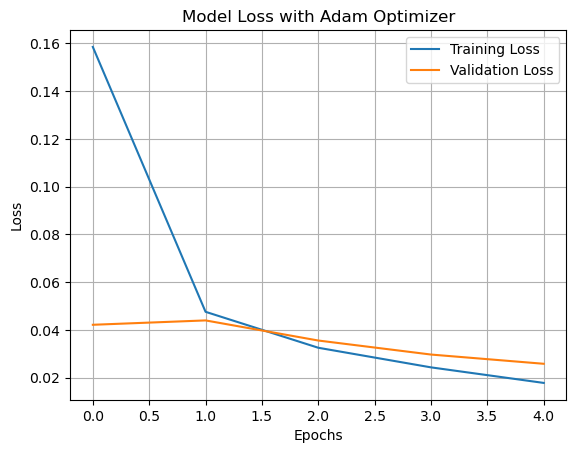

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(axis="both")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(axis="both")
plt.legend()
plt.show()